# Visualization

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## import the pkl

In [2]:
df = pd.read_pickle(r'D:\PythonPrjkt\Instacart Basket Analysis\02_Data\2.7_Prepared data\4.9_final_data_from_part_01.pkl')

# check if imported data shape matches with the shape when data was exported to pkl. This is to make sure that the correct file was exporte in the first place

In [3]:
df.shape

(290577, 30)

# histograms

In [4]:
df.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,Order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,...,median_order_duration,order_frequency,Gender,STATE,Age,date_joined,Number of dependants,Marital status,income,_merge
0,42,94891,4,4,5,13,15.0,22199,1,0,...,15.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both
1,42,94891,4,4,5,13,15.0,25146,2,0,...,15.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both
2,787017,31925,47329,4,3,10,12.0,22199,1,0,...,12.0,Regular customer,Male,Alabama,49,6/25/2017,0,single,159539,both
3,787017,31925,47329,4,3,10,12.0,24968,2,1,...,12.0,Regular customer,Male,Alabama,49,6/25/2017,0,single,159539,both
4,6612,95113,410,2,1,18,7.0,25146,18,0,...,7.0,Frequent customer,Female,Alaska,69,3/17/2020,3,married,73977,both


<AxesSubplot:>

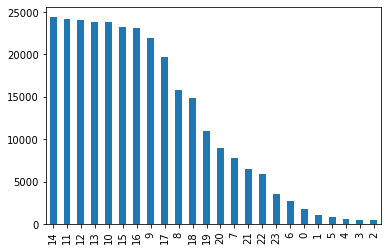

In [5]:

df['Order_time_of_day'].value_counts().plot.bar()

# The histogram is showing the busiest hours of the day in descending order

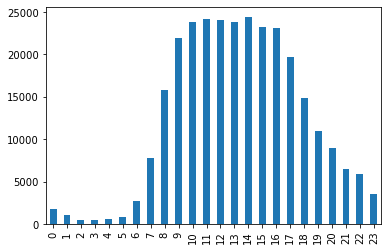

In [6]:
Busiest_hours_based_on_order_total = df['Order_time_of_day'].value_counts().sort_index().plot.bar()

In [7]:
#scatterme.figure.savefig(os.path.join(path,'ScatterPlot_Age_vs_Price.png'))
Busiest_hours_based_on_order_total.figure.savefig(os.path.join(r'D:\PythonPrjkt\Instacart Basket Analysis\04_Analysis\Visualizations','Busiest_hours_based_on_order_total.png'))

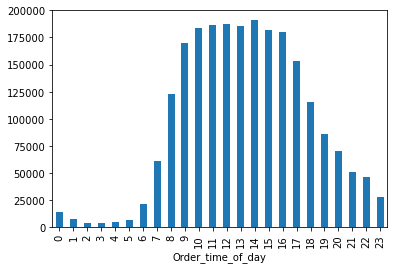

In [8]:
Busiest_hours_based_on_Price_total = df.groupby('Order_time_of_day')['prices'].sum().plot.bar()

In [9]:
Busiest_hours_based_on_Price_total.figure.savefig(os.path.join(r'D:\PythonPrjkt\Instacart Basket Analysis\04_Analysis\Visualizations','Busiest_hours_based_on_Price_total.png'))

# sorted on index to give a better profile to show the busiest hours. This is a much better way that clearly shows when the orders start picking up

In [10]:
pd.set_option("display.max_columns", None)

In [11]:
df.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,Order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,previous_merge,max_order,loyalty_flag,user_avg_price,spending_habit,median_order_duration,order_frequency,Gender,STATE,Age,date_joined,Number of dependants,Marital status,income,_merge
0,42,94891,4,4,5,13,15.0,22199,1,0,22200,Extra-Dry Cava,134,5,8.9,both,4,New customer,8.650000,Lower spender,15.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both
1,42,94891,4,4,5,13,15.0,25146,2,0,25147,Original Orange Juice,31,7,8.4,both,4,New customer,8.650000,Lower spender,15.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both
2,787017,31925,47329,4,3,10,12.0,22199,1,0,22200,Extra-Dry Cava,134,5,8.9,both,4,New customer,9.200000,Lower spender,12.0,Regular customer,Male,Alabama,49,6/25/2017,0,single,159539,both
3,787017,31925,47329,4,3,10,12.0,24968,2,1,24969,Sonoma Brut Sparkling Wine,134,5,9.5,both,4,New customer,9.200000,Lower spender,12.0,Regular customer,Male,Alabama,49,6/25/2017,0,single,159539,both
4,6612,95113,410,2,1,18,7.0,25146,18,0,25147,Original Orange Juice,31,7,8.4,both,28,Regular customer,6.588889,Lower spender,7.0,Frequent customer,Female,Alaska,69,3/17/2020,3,married,73977,both


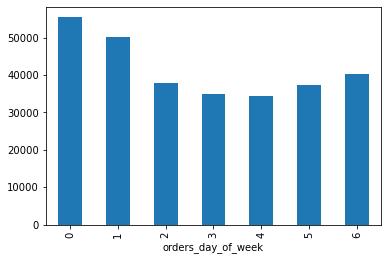

In [12]:
busiest_day = df.groupby('orders_day_of_week')['order_number'].count().plot.bar()


# create histogram for loyalty flag

In [13]:
busiest_day.figure.savefig(os.path.join(r'D:\PythonPrjkt\Instacart Basket Analysis\04_Analysis\Visualizations','busiest_day.png'))

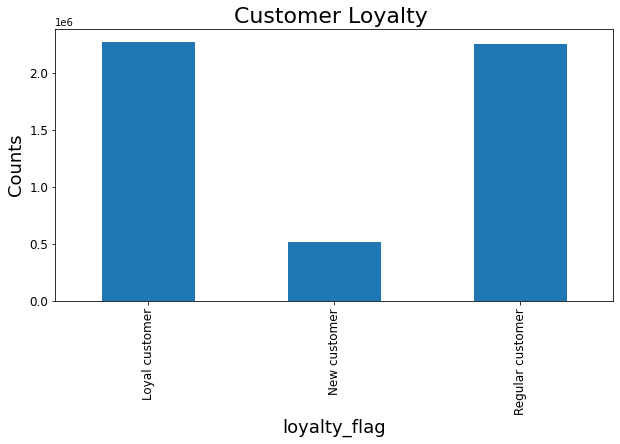

In [39]:
pt = df.groupby('loyalty_flag')['order_number'].sum()

ax = pt.plot.bar(title='Customer Loyalty ',figsize=(10,5),ylabel="Counts", fontsize='large')
#for item in ([ax.title, ax.xaxis.label, ax.yaxis.label]) : item.set_fontsize(20)
for item in (ax.get_xticklabels() + ax.get_yticklabels()) : item.set_fontsize(12)
for item in ([ax.xaxis.label, ax.yaxis.label]) : item.set_fontsize(18)
for item in ([ax.title]) : item.set_fontsize(22)
#for item in (ax.get_legend().get_texts()) : item.set_fontsize(18)
    
path = r'D:\PythonPrjkt\Instacart Basket Analysis\04_Analysis\Visualizations'
ax.figure.savefig(os.path.join(path,'Customer Loyalty.png'))

# histogram for order time of the day based on prices column

No handles with labels found to put in legend.


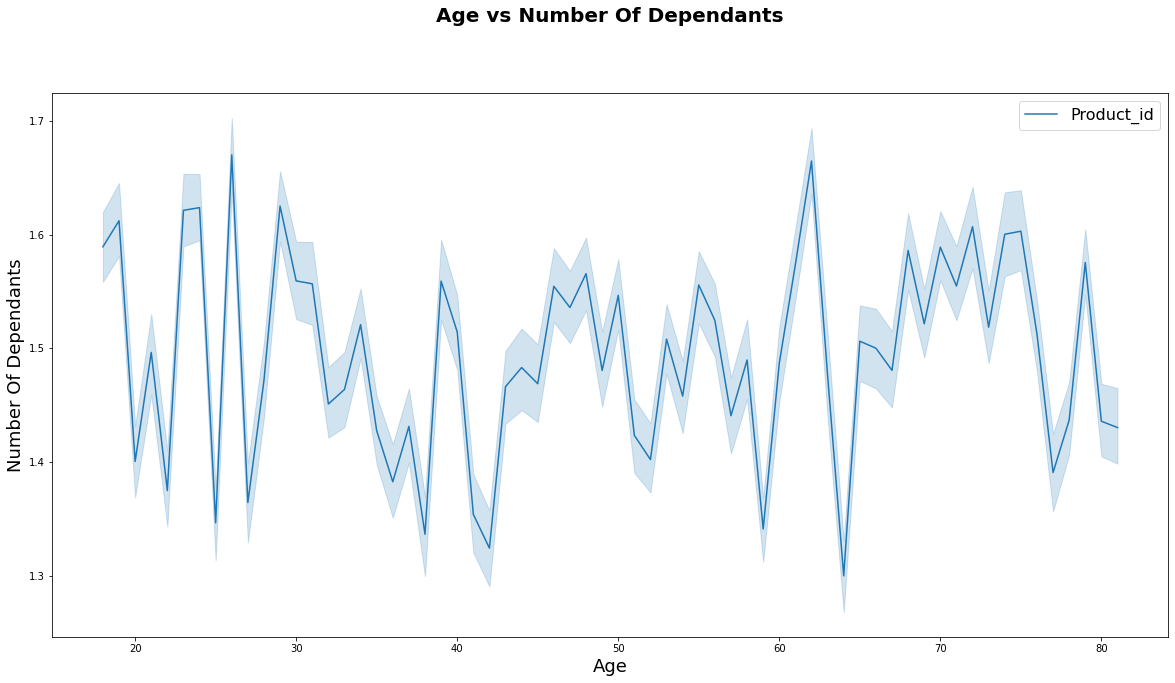

In [40]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
sns.lineplot(x = 'Age', y = 'Number of dependants',data = df)

ax.set_title("Age vs Number Of Dependants",y=1.12,fontsize=20,fontweight='bold')
ax.set_ylabel("Number Of Dependants",fontsize=18)
ax.set_xlabel("Age",fontsize=18)
ax.legend(loc="center right")
ax.legend(labels=["Product_id"], fontsize = 16)

# checking if sampling will make any difference

In [16]:
df['Age'].describe()

count    290577.000000
mean         49.543319
std          18.469089
min          18.000000
25%          34.000000
50%          50.000000
75%          65.000000
max          81.000000
Name: Age, dtype: float64

In [17]:
np.random.seed(4)
dev = np.random.rand(len(df)) <= 0.7

In [18]:
big = df[dev]
small = df[~dev]

In [19]:
big.shape

(203486, 30)

In [20]:
small.shape

(87091, 30)

In [21]:
df.shape

(290577, 30)

In [22]:
df_2 = big[['Age','Number of dependants']]

In [23]:
df_2.head()

,Age,Number of dependants
1,31,3
4,69,3
5,69,3
7,69,3
8,69,3


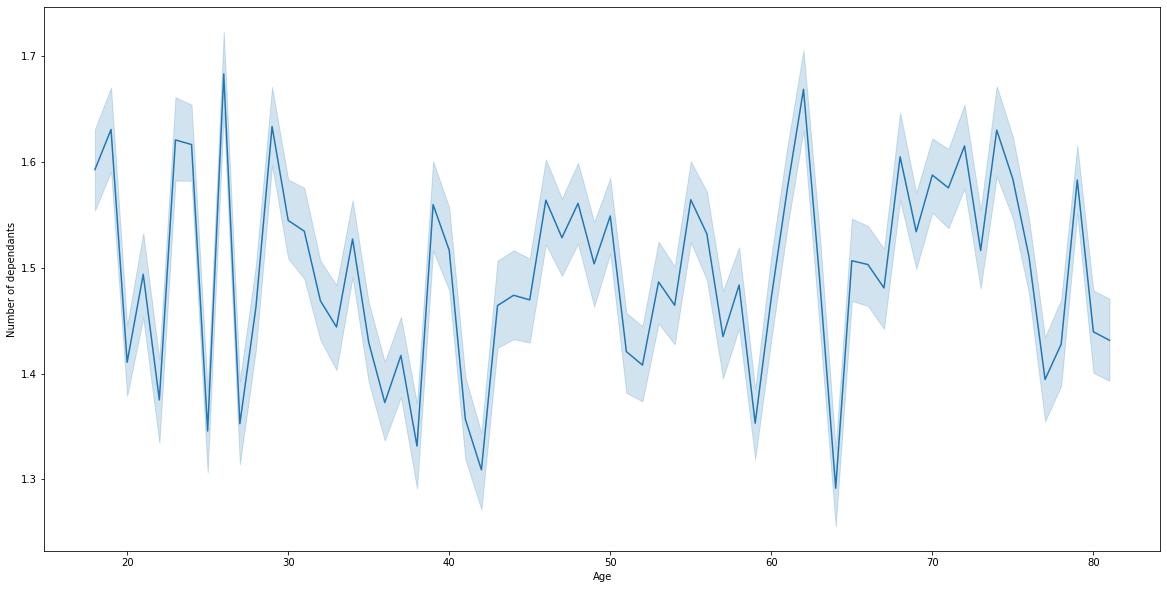

In [24]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
line = sns.lineplot(data = df_2, x = 'Age',y = 'Number of dependants')

<AxesSubplot:xlabel='Age', ylabel='Number of dependants'>

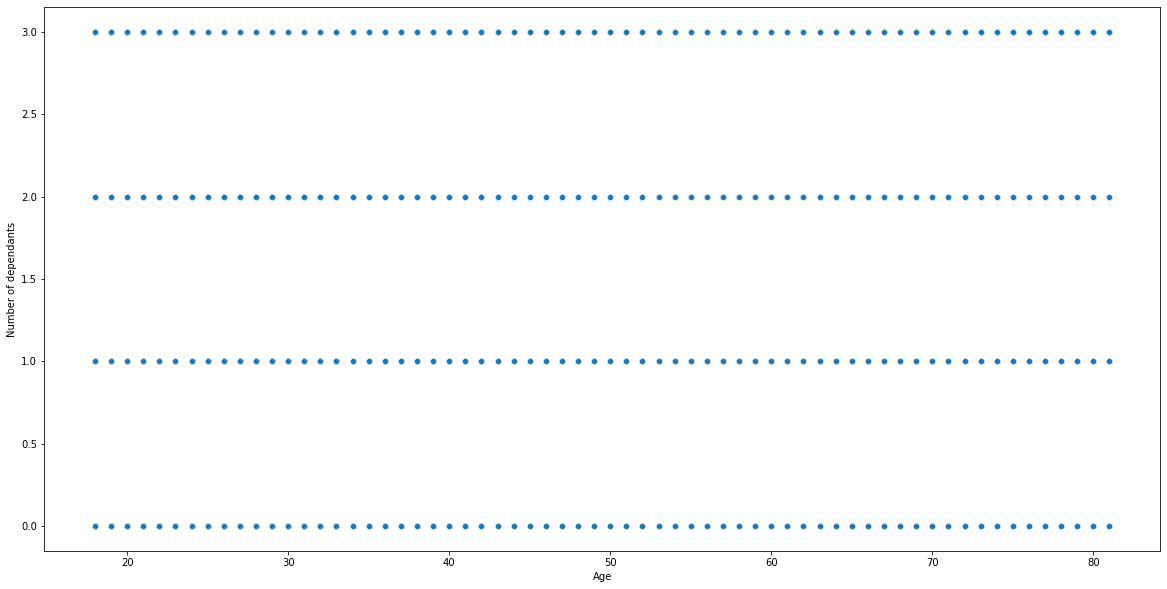

In [25]:
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot()
sns.scatterplot(x = 'Age', y = 'Number of dependants',data = df_2)

<AxesSubplot:xlabel='Age', ylabel='Number of dependants'>

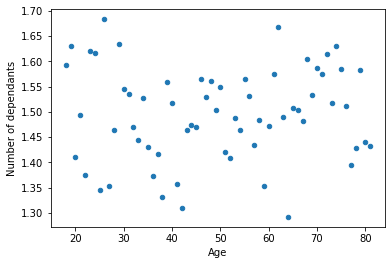

In [26]:

df_2.groupby(['Age']).mean().reset_index().plot(kind='scatter',x='Age',y='Number of dependants')

<AxesSubplot:xlabel='Age', ylabel='Number of dependants'>

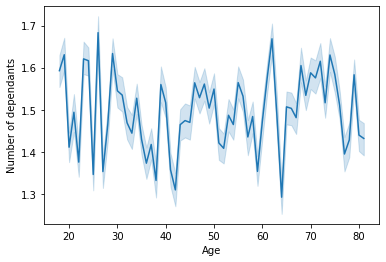

In [27]:
sns.lineplot(data = df_2, x = 'Age',y = 'Number of dependants')

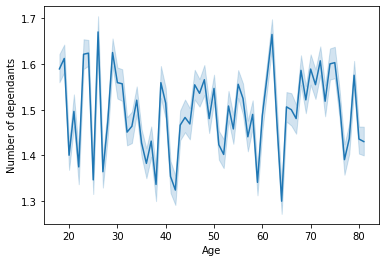

In [28]:
lineme = sns.lineplot(x = 'Age', y = 'Number of dependants',data = df[['Age', 'Number of dependants']])

### The line chart does not show any connection between age and family size.

<AxesSubplot:xlabel='Age', ylabel='Number of dependants'>

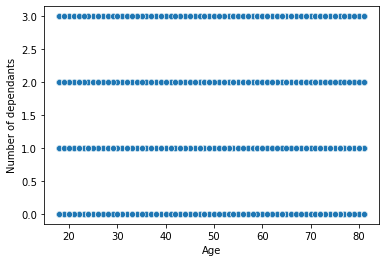

In [29]:
sns.scatterplot(x = 'Age', y = 'Number of dependants',data = df[['Age', 'Number of dependants']])

# It appears that the plots shows what the data is. No further experiments

In [30]:
df.head()

,Unnamed: 0_x,order_id,user_id,order_number,orders_day_of_week,Order_time_of_day,days_since_prior_order,product_id,add_to_cart_order,reordered,Unnamed: 0_y,product_name,aisle_id,department_id,prices,previous_merge,max_order,loyalty_flag,user_avg_price,spending_habit,median_order_duration,order_frequency,Gender,STATE,Age,date_joined,Number of dependants,Marital status,income,_merge
0,42,94891,4,4,5,13,15.0,22199,1,0,22200,Extra-Dry Cava,134,5,8.9,both,4,New customer,8.650000,Lower spender,15.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both
1,42,94891,4,4,5,13,15.0,25146,2,0,25147,Original Orange Juice,31,7,8.4,both,4,New customer,8.650000,Lower spender,15.0,Regular customer,Male,Arkansas,31,9/21/2017,3,married,45435,both
2,787017,31925,47329,4,3,10,12.0,22199,1,0,22200,Extra-Dry Cava,134,5,8.9,both,4,New customer,9.200000,Lower spender,12.0,Regular customer,Male,Alabama,49,6/25/2017,0,single,159539,both
3,787017,31925,47329,4,3,10,12.0,24968,2,1,24969,Sonoma Brut Sparkling Wine,134,5,9.5,both,4,New customer,9.200000,Lower spender,12.0,Regular customer,Male,Alabama,49,6/25/2017,0,single,159539,both
4,6612,95113,410,2,1,18,7.0,25146,18,0,25147,Original Orange Juice,31,7,8.4,both,28,Regular customer,6.588889,Lower spender,7.0,Frequent customer,Female,Alaska,69,3/17/2020,3,married,73977,both


In [43]:
df_3 = big[['prices','Age']]

In [44]:
df_3.head()

,prices,Age
1,8.4,31
4,8.4,69
5,1.3,69
7,4.0,69
8,12.2,69


No handles with labels found to put in legend.


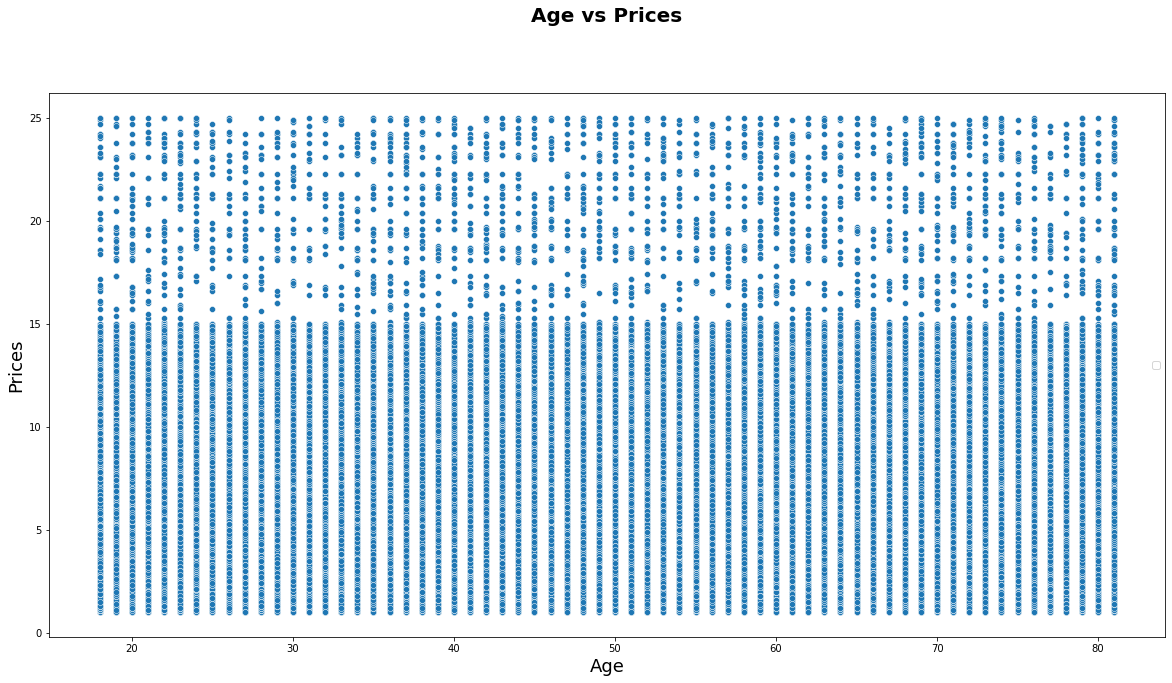

In [46]:
fig = plt.figure(figsize=(20,10))

ax = sns.scatterplot(x = 'Age', y = 'prices',data = df_3[['Age', 'prices']])

ax.set_title("Age vs Prices",y=1.12,fontsize=20,fontweight='bold')
ax.set_ylabel("Prices",fontsize=18)
ax.set_xlabel("Age",fontsize=18)
ax.legend(loc="center right")
#ax.legend(labels=["Product_id"], fontsize = 16)

### The scatter plot does not give any conclusive evidence that the age and spending power are related

In [34]:
path = r'D:\PythonPrjkt\Instacart Basket Analysis\04_Analysis\Visualizations'

In [35]:
scatterme.figure.savefig(os.path.join(path,'ScatterPlot_Age_vs_Price.png'))

In [36]:
lineme.figure.savefig(os.path.join(path,'LinePlot_Age_vs_Price.png'))

### contents
### scatter plot, scattter plot export as image